In [31]:
import tensorflow as tf
from tensorflow.keras import datasets, layers, models
import matplotlib.pyplot as plt
import numpy as np

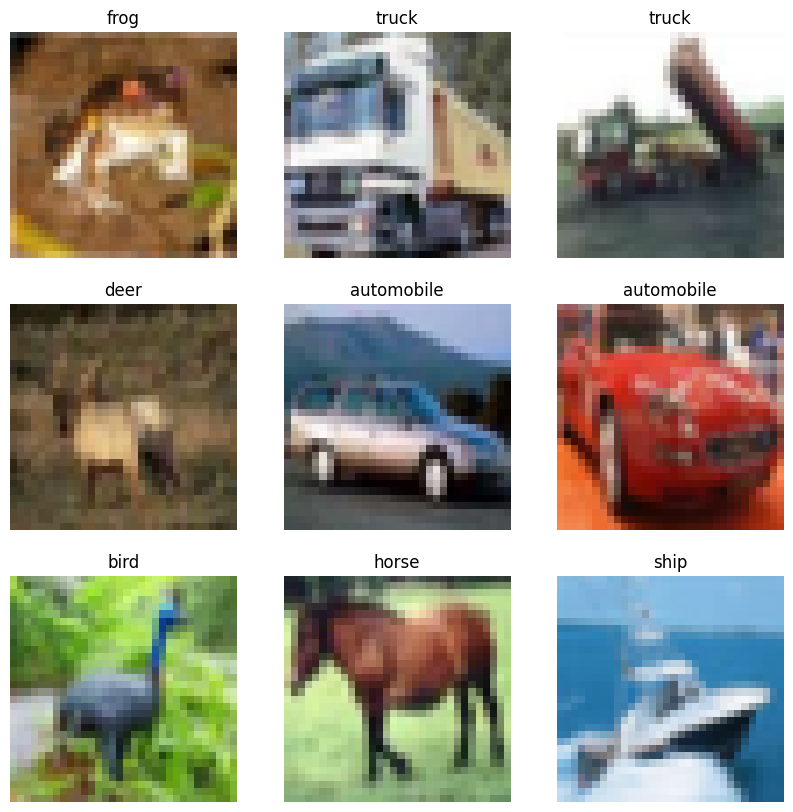

In [32]:
# Load and Preprocess Data

(train_images, train_labels), (test_images, test_labels) = datasets.cifar10.load_data()

train_images, test_images = train_images / 255.0, test_images / 255.0

class_names = ['airplane', 'automobile', 'bird', 'cat', 'deer', 'dog', 'frog', 'horse', 'ship', 'truck']

# Display a sample image
plt.figure(figsize=(10, 10))
for i in range(9):
    plt.subplot(3, 3, i + 1)
    plt.imshow(train_images[i])
    plt.title(class_names[train_labels[i][0]])
    plt.axis('off')
plt.show()

In [33]:
# Build the CNN Model

model = models.Sequential([
    layers.Conv2D(32, (3, 3), activation='relu', input_shape=(32, 32, 3)),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.Flatten(),
    layers.Dense(64, activation='relu'),
    layers.Dense(10, activation='softmax')
])

/usr/local/lib/python3.10/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [34]:
# Compile the Model

model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

In [36]:
# Train the Model

history = model.fit(train_images, train_labels, epochs=100,
                    validation_data=(test_images, test_labels))

Epoch 1/100
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 6s 4ms/step - accuracy: 0.5787 - loss: 1.1884 - val_accuracy: 0.6196 - val_loss: 1.0786
Epoch 2/100
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.6423 - loss: 1.0200 - val_accuracy: 0.6615 - val_loss: 0.9658
Epoch 3/100
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 10s 4ms/step - accuracy: 0.6814 - loss: 0.9181 - val_accuracy: 0.6630 - val_loss: 0.9623
Epoch 4/100
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 10s 4ms/step - accuracy: 0.7118 - loss: 0.8263 - val_accuracy: 0.6954 - val_loss: 0.8921
Epoch 5/100
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.7313 - loss: 0.7743 - val_accuracy: 0.7052 - val_loss: 0.8599
Epoch 6/100
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.7513 - loss: 0.7060 - val_accuracy: 0.7131 - val_loss: 0.8483
Epoch 7/100
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 6s 4ms/step - accuracy: 0.7632 - loss: 0.6748 - val_accuracy: 0.6989 - val_loss: 0.8933
Epoch 8/100
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 10s 3ms/step - accuracy: 0.7792 - loss

In [37]:
# Evaluate the Model

test_loss, test_acc = model.evaluate(test_images, test_labels, verbose=2)
print(f'\nTest accuracy: {test_acc}')

313/313 - 1s - 2ms/step - accuracy: 0.6724 - loss: 3.6216

Test accuracy: 0.6723999977111816


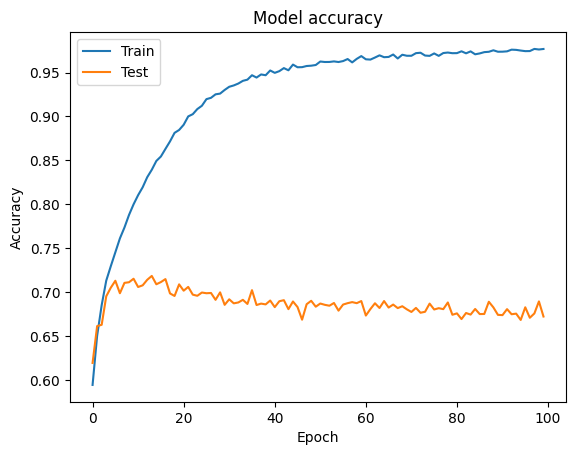

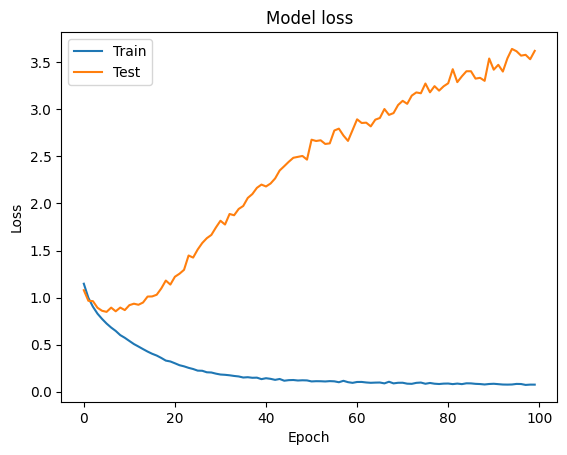

In [38]:
# Visualize Results

# Plot training & validation accuracy values
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()

# Plot training & validation loss values
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step


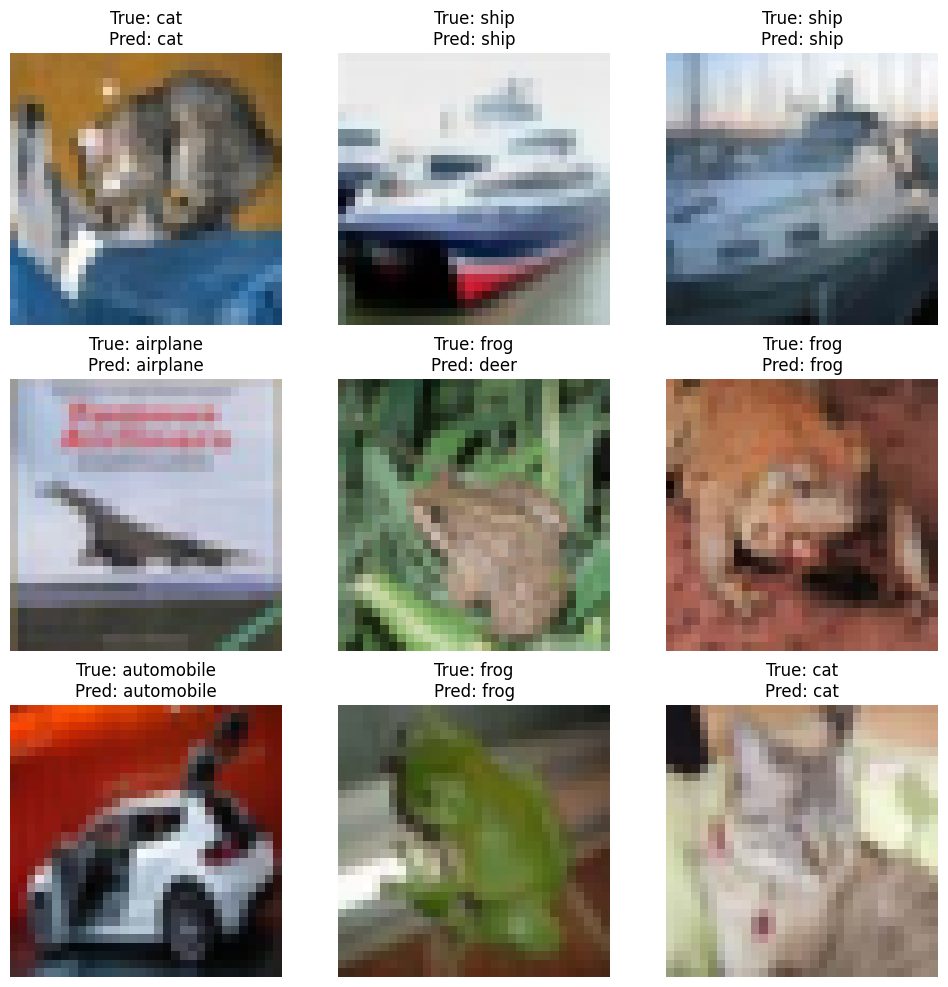

In [39]:
# Predict labels for test images
predictions = model.predict(test_images)

def plot_images_with_predictions(images, labels, predictions, class_names):
    plt.figure(figsize=(12, 12))
    num_images = 9
    for i in range(num_images):
        plt.subplot(3, 3, i + 1)
        plt.imshow(images[i])
        true_label = class_names[labels[i][0]]
        predicted_label = class_names[np.argmax(predictions[i])]
        plt.title(f'True: {true_label}\nPred: {predicted_label}')
        plt.axis('off')
    plt.show()

# Plot some test images with actual and predicted labels
plot_images_with_predictions(test_images, test_labels, predictions, class_names)